In [2]:
import pandas as pd
import glob
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [79]:
companies = pd.read_csv("corpwatch_api_tables_csv/company_info.csv", delimiter="\t", dtype={'sector_name' :'S',
                                                                                          'industry_name' : 'S',
                                                                                            'sic_sector' : 'S'
                                                                                           })
relations = pd.read_csv("corpwatch_api_tables_csv/company_relations.csv", delimiter="\t")
locations = pd.read_csv("corpwatch_api_tables_csv/company_locations.csv", delimiter="\t", low_memory=False)

[CorpWatch column names reference](http://api.corpwatch.org/documentation/db_dump/README.txt)

### Merge country and location datasets

In [80]:
r = relations[['source_cw_id','target_cw_id','year','relation_origin']]
c = companies[['cw_id', 'cik','irs_number', 'company_name', 'best_location_id','sic_sector',
               'num_parents', 'num_children', 'top_parent_id','most_recent','year','min_year','max_year']]
l = locations[['location_id', 'state', 'country_code']]

In [81]:
data = pd.merge(left=c, right=l, left_on="best_location_id", right_on="location_id", how="left")

In [82]:
data = data.drop(['best_location_id', 'location_id'], axis=1)

In [83]:
data.head(20)

,cw_id,cik,irs_number,company_name,sic_sector,num_parents,num_children,top_parent_id,most_recent,year,min_year,max_year,state,country_code
0,1,20.0,221759452.0,K TRON INTERNATIONAL INC,3800,1,20,54894,0,2010,2003,2011,NJ,US
1,12,2070.0,NaN,Acme Electric Corp,NaN,1,0,123,0,2005,2005,2008,NaN,US
2,12,2070.0,NaN,Acme Electric Corp,NaN,1,0,123,0,2006,2005,2008,NaN,US
3,12,2070.0,NaN,Acme Electric Corp,NaN,1,0,123,0,2007,2005,2008,NaN,US
4,12,2070.0,160324980.0,ACME ELECTRIC CORP,3600,1,0,123,1,2008,2005,2008,NY,US
5,15,2135.0,NaN,Affiliated Computer Services Inc,NaN,1,0,1982,0,2011,2003,2012,NaN,US
6,15,2135.0,NaN,Affiliated Computer Services Inc,NaN,1,0,1982,1,2012,2003,2012,NaN,US
7,22,2491.0,880104066.0,BALLY TECHNOLOGIES INC,7300,1,0,4095,0,2015,2003,2016,NV,US
8,22,2491.0,NaN,Bally Technologies Inc,NaN,1,0,4095,1,2016,2003,2016,NaN,US
9,24,2601.0,111974412.0,AEROFLEX INC,3600,1,0,601074,0,2011,2003,2013,NY,US


In [142]:
data.describe()

,cw_id,cik,irs_number,num_parents,num_children,top_parent_id,most_recent,year,min_year,max_year
count,3.109283e+06,3.109064e+06,7.532160e+05,3.109283e+06,3.109283e+06,3.109283e+06,3.109283e+06,3.109283e+06,3.109283e+06,3.109283e+06
mean,3.345818e+05,5.110050e+05,2.965487e+08,7.102178e-01,7.102178e-01,1.444733e+05,2.908429e-01,2.009659e+03,2.006609e+03,2.012741e+03
std,2.617719e+05,6.459057e+05,3.068956e+08,8.207103e-01,1.397378e+01,2.412987e+05,4.541513e-01,3.956335e+00,3.770880e+00,3.793737e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.003000e+03,2.003000e+03,2.003000e+03
25%,1.140550e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.300000e+03,0.000000e+00,2.006000e+03,2.003000e+03,2.010000e+03
50%,2.362770e+05,0.000000e+00,2.232687e+08,1.000000e+00,0.000000e+00,1.645100e+04,0.000000e+00,2.010000e+03,2.005000e+03,2.015000e+03
75%,5.608560e+05,1.233001e+06,4.733366e+08,1.000000e+00,0.000000e+00,2.430890e+05,1.000000e+00,2.013000e+03,2.009000e+03,2.016000e+03
max,9.243790e+05,1.674680e+06,1.000000e+09,6.700000e+01,2.808000e+03,9.241600e+05,1.000000e+00,2.016000e+03,2.016000e+03,2.016000e+03


## Number of children in over the years

2009469 children companies & 1099814 parent companies

In [87]:
children = data[data['num_parents'] != 0][['cik','year']].drop_duplicates().groupby('year').count() #have at least one parent

In [88]:
parents = data[data['num_children'] != 0][['cik','year']].drop_duplicates().groupby('year')['cik'].count() #have at least one child

In [89]:
parentless = data[data['num_parents'] == 0][['cik','year']].drop_duplicates().groupby('year')['cik'].count() #have no parent

In [90]:
childless = data[data['num_children'] == 0][['cik','year']].drop_duplicates().groupby('year')['cik'].count() #have at no child

### amount of companies per year

In [91]:
data[['cik', 'year']].drop_duplicates().groupby('year').count()

,cik
year,
2003,78643
2004,91731
2005,90227
2006,90304
2007,90455
2008,81855
2009,89134
2010,94356
2011,96047


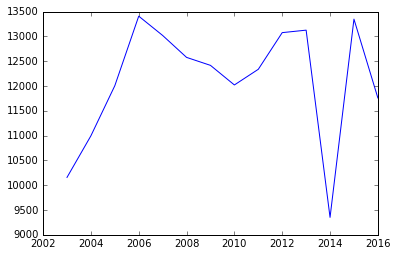

In [92]:
plt.plot(children)

The amount of companies that say to have at least one child company is on decline (while the amount of companies stays roughly the same).

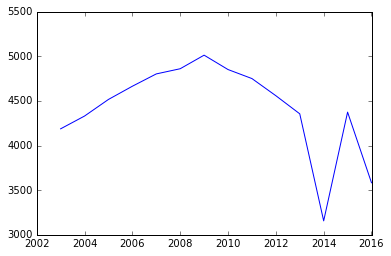

In [93]:
plt.plot(parents)

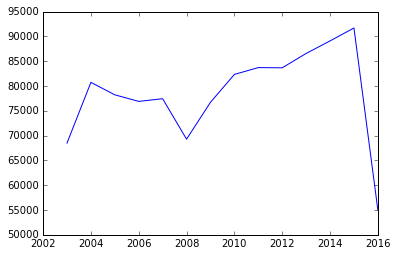

In [94]:
plt.plot(parentless)

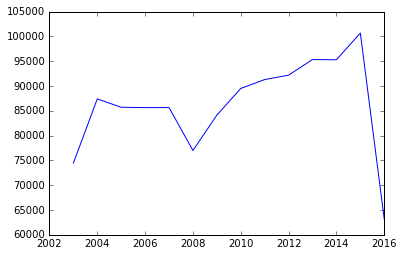

In [95]:
plt.plot(childless)

### Extractive industry

Get the SICs of extractive industries. Only 2-digits depth present in the dataset. Chosen SICs that are all extractive. [sic codes reference](https://www.sec.gov/info/edgar/siccodes.htm)

In [84]:
#esic = pd.read_csv("extraction_sics.csv", header=None, names=["SIC"])["SIC"].tolist()
#esic2 = [str(e)[:2] for e in esic]

In [127]:
esic2 = ['10','11','12','13','14','33']

get all rows where the SIC starts with `esic2` elements

In [137]:
edata = data.ix[data['sic_sector'].str.contains(r'^'+'..|'.join(esic2), na=False)].reset_index()

In [145]:
edata.groupby('sic_sector')['cik'].count()

sic_sector
1000    6641
1200     709
1300    8068
1400    1034
3300    1445
Name: cik, dtype: int64

In [146]:
edata.describe()

,index,cw_id,cik,irs_number,num_parents,num_children,top_parent_id,most_recent,year,min_year,max_year
count,1.789700e+04,17897.000000,1.789700e+04,1.746300e+04,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,2.226199e+06,99825.714142,1.073994e+06,4.029286e+08,0.043136,3.640945,97418.020674,0.143097,2009.325250,2004.671230,2013.908867
std,4.636393e+05,177501.581103,3.756819e+05,3.796470e+08,0.222090,18.575200,177168.280946,0.350181,3.803891,2.496461,3.007537
min,1.408000e+03,6.000000,1.853000e+03,0.000000e+00,0.000000,0.000000,6.000000,0.000000,2003.000000,2003.000000,2003.000000
25%,2.114776e+06,11891.000000,9.125000e+05,0.000000e+00,0.000000,0.000000,11782.000000,0.000000,2006.000000,2003.000000,2013.000000
50%,2.242939e+06,29935.000000,1.133932e+06,2.660539e+08,0.000000,0.000000,27334.000000,0.000000,2009.000000,2003.000000,2016.000000
75%,2.393069e+06,53993.000000,1.351765e+06,7.703236e+08,0.000000,0.000000,52120.000000,0.000000,2012.000000,2006.000000,2016.000000
max,3.107218e+06,922096.000000,1.664576e+06,1.000000e+09,5.000000,501.000000,922096.000000,1.000000,2016.000000,2016.000000,2016.000000
